<a href="https://colab.research.google.com/github/awesomeoppa/MCIT591/blob/master/Final_version_2022_CIS545_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#CIS 5450 Project -  Loan Risk Detection
> Summer 2022 | Course Project
> Team Member: Zhan Gao, Yimeng Chen



# Project Summary

Traditionally, humans made those decisions whether to reject a loan application or not. Nowadays, people try to build machine learning models to detect the Loan Risk. The Loan Risk Detection Problem includes modeling all attributes with the knowledge of the ones that turned out to be at high risk to repay the loan . This model is then used to identify whether a new application is at risk or not. In this project, we define these loan applications with risk as Fraud Loan.

This data set is uploaded in order to get the insights of Credit card Defaulters based on the respective attributes. We assume that the load application by Credit car Defaultees is at high risk. Dataset contains 307510 rows and 122 columns including target columns. The subject of this project is to build a model to detect Loan Application with Credit card Defaultees and deny these applications.



# Table Content and Highlights


#### Part 1: Data Loading and Preprocessing
#### Part 2: Exploratory Data Analysis (EDA)
#### Part 3: Feature Engineering
#### Part 4: Build a Classification Model
#### Part 5: Conclusion 
>  Final dataset has 47 features, tried random forest, XGboost, logistict regression and naive bayes, tried SMOTE oversampling method.
>  Final model with 93.46% accuracy, 99% precision, 18.8% recall, 61% f2-score.









# **Part I:** Data Loading and Preprocessing

In [ ]:
# Sklearn and Pandas Setup
import json
import glob
import pandas as pd
import numpy as np
import datetime as dt
import re
import os
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import cm
from google.colab import drive

In [ ]:

import sklearn.metrics as metrics
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score,f1_score,precision_score, recall_score, fbeta_score, roc_auc_score

from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC, SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.calibration import CalibratedClassifierCV
import xgboost as xgb
from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import roc_curve, auc
import math


In [ ]:
from sklearn.metrics import accuracy_score,f1_score,precision_score, recall_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from collections import Counter
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier  
#from catboost import CatBoostClassifier
from imblearn.over_sampling import RandomOverSampler,SMOTE

In [ ]:
pd.set_option('display.max_columns', None)


 **1.1** Unzip Files and Read Data

We are using application_data.csv file for this problem. Download application_data.zip and unzip to csv from Kaggle dataset. 

In [ ]:
!unzip /content/application_data.zip

Archive:  /content/application_data.zip
  inflating: application_data.csv    


In [ ]:
## read csv file
df = pd.read_csv('application_data.csv')
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [ ]:
## take a look at data size (columns and rows)
df.shape

(307511, 122)

In [ ]:
# Display the basic information for this dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [ ]:
# Check the basic statistics information of this dataset

df.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,104582.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307509.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,134133.000000,3.068510e+05,246546.000000,151450.00000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,159080.000000,306490.000000,306490.000000,306490.000000,306490.000000,307510.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.00000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,-4986.120328,-2994.202373,12.061091,0.999997,0.819889,0.199368,0.998133,0.281066,0.056720,2.152665,2.052463,2.031521,12.063419,0.015144,0.050769,0.040659,0.078173,0.230454,0.179555,0.502130,5.143927e-01,0.510853,0.11744,0.088442,0.977735,0.752471,0.044621,0.078942,0.149725,0.226282,0.231894,0.066333,0.100775,0.107399,0.008809,0.028358,0.114231,0.087543,0.977065,0.759637,0.042553,0.074490,0.145193,0.222315,0.228058,0.064958,0.105645,0.105975,0.008076,0.027022,0.117850,0.087955,0.97

In [ ]:
## take a look at all column names
list(df.columns)

['SK_ID_CURR',
 'TARGET',
 'NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'REGION_POPULATION_RELATIVE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'OWN_CAR_AGE',
 'FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'OCCUPATION_TYPE',
 'CNT_FAM_MEMBERS',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'WEEKDAY_APPR_PROCESS_START',
 'HOUR_APPR_PROCESS_START',
 'REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'ORGANIZATION_TYPE',
 'EXT_SOURCE_1',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'APARTMENTS_AVG',
 'BASEMENTAREA_AVG',
 'YEARS_BEGINEXPLUATATION_A

Based on roughly check on column names, found there are many features ending with MODE, MEDI, AVG, and there are lots of similar features ending with different prefix

**1.2** Handel Missing Values

In [ ]:
# Check the Null value of the dataset
df.isnull().values.any()

True

In [ ]:
# Check missing values in each filed. If missing values is larger than 50%, then color bars in red. Else, color bars in green.

missing_df = (df.isnull().sum()/len(df)*100).reset_index()
missing_df.columns = ['column_name', 'missing_count']
missing_df = missing_df.loc[missing_df['missing_count']>0]
missing_df = missing_df.sort_values(by='missing_count')

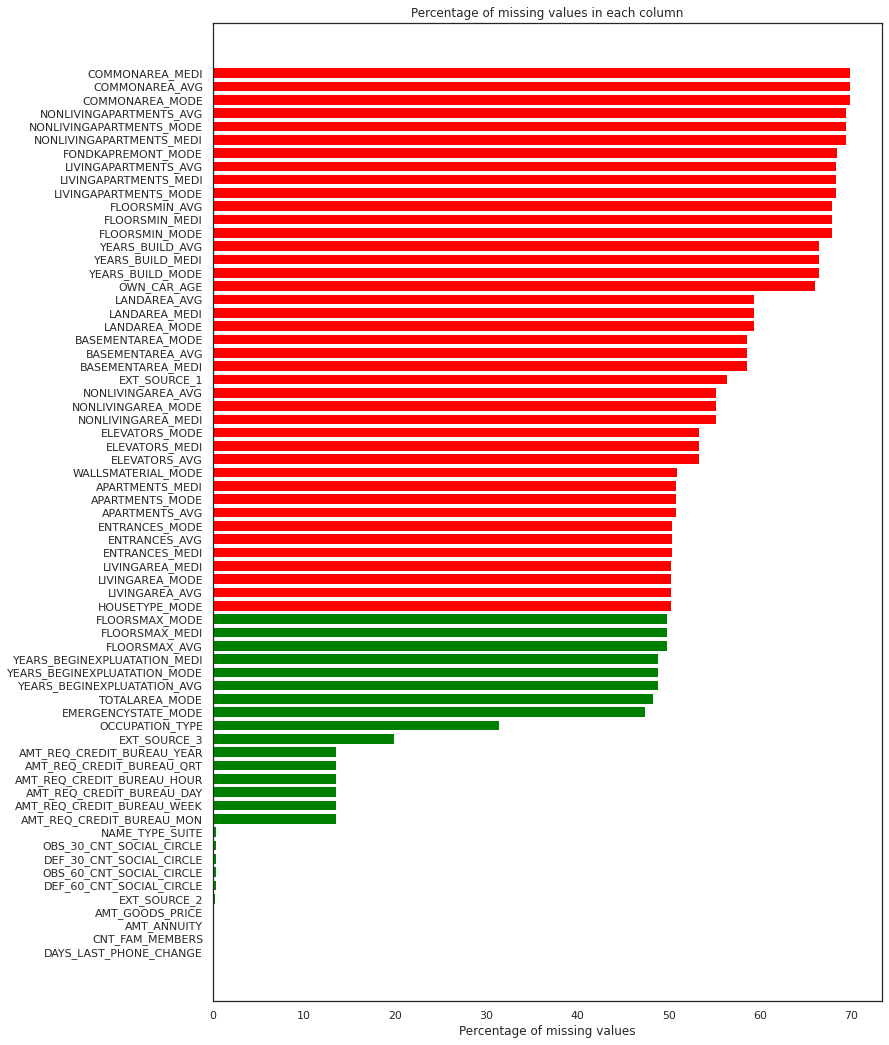

In [ ]:
ind = np.arange(missing_df.shape[0])
width = 0.9
fig, ax = plt.subplots(figsize=(12,18))
colors = ["red" if i >50 else "green" for i in missing_df.missing_count.values]
rects = ax.barh(ind, missing_df.missing_count.values, color=colors)
ax.set_yticks(ind)
ax.set_yticklabels(missing_df.column_name.values, rotation='horizontal')
ax.set_xlabel("Percentage of missing values")
ax.set_title("Percentage of missing values in each column")
plt.show()

Features with too many Null values is hard to be an important feature. Theoretically, 25 to 30% is the missing values range to be considered for imputation, beyond which we might want to drop the feature from analysis. Here, we would like to drop features with missing values larger than 50%.

In [ ]:
#Percentage of null values in each column
col_with_missingvalue=df.isnull().sum()/len(df)*100
null_more_50=col_with_missingvalue[col_with_missingvalue.values>50.0].sort_values(ascending=False)
null_more_50


COMMONAREA_AVG              69.872297
COMMONAREA_MEDI             69.872297
COMMONAREA_MODE             69.872297
NONLIVINGAPARTMENTS_MEDI    69.432963
NONLIVINGAPARTMENTS_AVG     69.432963
NONLIVINGAPARTMENTS_MODE    69.432963
FONDKAPREMONT_MODE          68.386172
LIVINGAPARTMENTS_MEDI       68.354953
LIVINGAPARTMENTS_AVG        68.354953
LIVINGAPARTMENTS_MODE       68.354953
FLOORSMIN_MODE              67.848630
FLOORSMIN_MEDI              67.848630
FLOORSMIN_AVG               67.848630
YEARS_BUILD_MODE            66.497784
YEARS_BUILD_AVG             66.497784
YEARS_BUILD_MEDI            66.497784
OWN_CAR_AGE                 65.990810
LANDAREA_AVG                59.376738
LANDAREA_MEDI               59.376738
LANDAREA_MODE               59.376738
BASEMENTAREA_MEDI           58.515956
BASEMENTAREA_AVG            58.515956
BASEMENTAREA_MODE           58.515956
EXT_SOURCE_1                56.381073
NONLIVINGAREA_MODE          55.179164
NONLIVINGAREA_MEDI          55.179164
NONLIVINGARE

In [ ]:
## take a look at how many columns have more than 50% missing values
print(len(null_more_50))

41


Since there are 41 columns with missing values more than 50%, which occuplies almost 1/3 of all columns, here we will just drop features with more than 60% missing values, then do further feature cleanings

In [ ]:
col_with_missingvalue = list(col_with_missingvalue[col_with_missingvalue.values>=60.0].index)
df.drop(labels=col_with_missingvalue,axis=1,inplace=True)
print(len(col_with_missingvalue))

17


Features with more than 60% missing values have been dropped. Now, the number of features is 105.

In [ ]:
df.shape

(307511, 105)

**1.3** Check categorical features

In [ ]:
data_types = df.dtypes  
cat_cols = list(data_types[data_types=='object'].index)
int_cols = list(data_types[data_types=='int64'].index) 
float_cols = list(data_types[data_types=='float64'].index)

In [ ]:
## check categorical features

print("Categorical feature numbers:" + str(len(cat_cols)))
print(df.select_dtypes('object').columns)


Categorical feature numbers:15
Index(['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE',
       'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE', 'HOUSETYPE_MODE',
       'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE'],
      dtype='object')


**1.4** Check numerical features

In [ ]:
## check integer features

print("Categorical feature numbers:" + str(len(int_cols)))
print(df.select_dtypes('int').columns)

Categorical feature numbers:41
Index(['SK_ID_CURR', 'TARGET', 'CNT_CHILDREN', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'DAYS_ID_PUBLISH', 'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE',
       'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'FLAG_DOCUMENT_2',
       'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5',
       'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8',
       'FLAG_DOCUMENT_9', 'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11',
       'FLAG_DOCUMENT_12', 'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14',
       'FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17',
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21'],
      dtype='object')


In [ ]:
## check float features

print("Categorical feature numbers:" + str(len(float_cols)))
print(df.select_dtypes('float64').columns)

Categorical feature numbers:49
Index(['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       'REGION_POPULATION_RELATIVE', 'DAYS_REGISTRATION', 'CNT_FAM_MEMBERS',
       'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'APARTMENTS_AVG',
       'BASEMENTAREA_AVG', 'YEARS_BEGINEXPLUATATION_AVG', 'ELEVATORS_AVG',
       'ENTRANCES_AVG', 'FLOORSMAX_AVG', 'LANDAREA_AVG', 'LIVINGAREA_AVG',
       'NONLIVINGAREA_AVG', 'APARTMENTS_MODE', 'BASEMENTAREA_MODE',
       'YEARS_BEGINEXPLUATATION_MODE', 'ELEVATORS_MODE', 'ENTRANCES_MODE',
       'FLOORSMAX_MODE', 'LANDAREA_MODE', 'LIVINGAREA_MODE',
       'NONLIVINGAREA_MODE', 'APARTMENTS_MEDI', 'BASEMENTAREA_MEDI',
       'YEARS_BEGINEXPLUATATION_MEDI', 'ELEVATORS_MEDI', 'ENTRANCES_MEDI',
       'FLOORSMAX_MEDI', 'LANDAREA_MEDI', 'LIVINGAREA_MEDI',
       'NONLIVINGAREA_MEDI', 'TOTALAREA_MODE', 'OBS_30_CNT_SOCIAL_CIRCLE',
       'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE',
       'DEF_60_CNT_SOCIAL_CIRCLE', 'DAYS_LAST_P

# **Part II:** Exploratory Data Analysis (EDA)


**2.1** Check label distribution

In [ ]:
#Checking the distribution of target variable
#TARGET == 1 means Credit card Defaulter ; TARGET == 1 means Not Credit card Defaulter

pos_target=df[df.TARGET==1]
neg_target=df[df.TARGET==0]

In [ ]:
#checking percentage of defaulters
pos_target=(len(pos_target)*100)/len(df)
pos_target

8.072881945686495

Observation: around 8% data with target = 1, not an extremely imbalanced dataset, but for practice purpost we still want to use oversampling method to handel imbalance problem here

**2.2** Data observation categorical features

In [ ]:
## take a look at categorical feature unique values
df_unique = df.select_dtypes('object').describe().T
df_unique.sort_values('unique')

,count,unique,top,freq
NAME_CONTRACT_TYPE,307511,2,Cash loans,278232
FLAG_OWN_CAR,307511,2,N,202924
FLAG_OWN_REALTY,307511,2,Y,213312
EMERGENCYSTATE_MODE,161756,2,No,159428
CODE_GENDER,307511,3,F,202448
HOUSETYPE_MODE,153214,3,block of flats,150503
NAME_EDUCATION_TYPE,307511,5,Secondary / secondary special,218391
NAME_FAMILY_STATUS,307511,6,Married,196432
NAME_HOUSING_TYPE,307511,6,House / apartment,272868
NAME_TYPE_SUITE,306219,7,Unaccompanied,248526


**Observation:** ORGANIZATION_TYPE column has most unique values, followed by OCCUPATION_TYPE. We will investigate these two fields first.

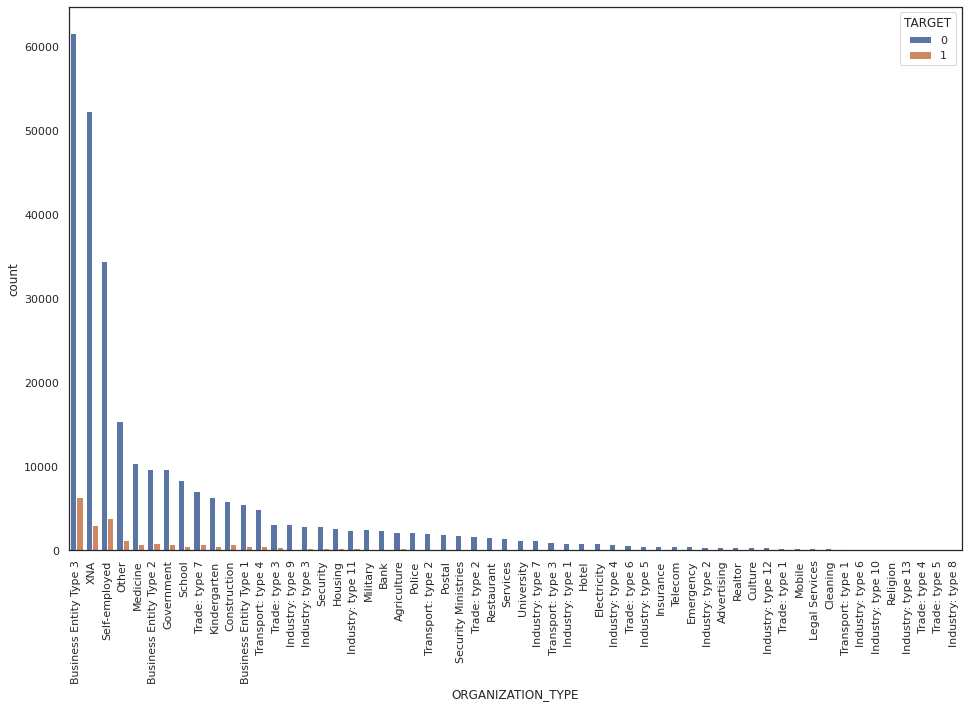

In [ ]:
plt.subplots(figsize=(16, 10))
plt.xticks(rotation = '90')
sns.countplot(x='ORGANIZATION_TYPE', hue= 'TARGET', data = df , order = df['ORGANIZATION_TYPE'].value_counts().index)

**Observations:** Applicants working in 'Business Entity type 3' seems to be the highest for both fauld and non-fauld. Other ORGANIZATION_TYPE are realted to 'TARGET'. We will keep this column.

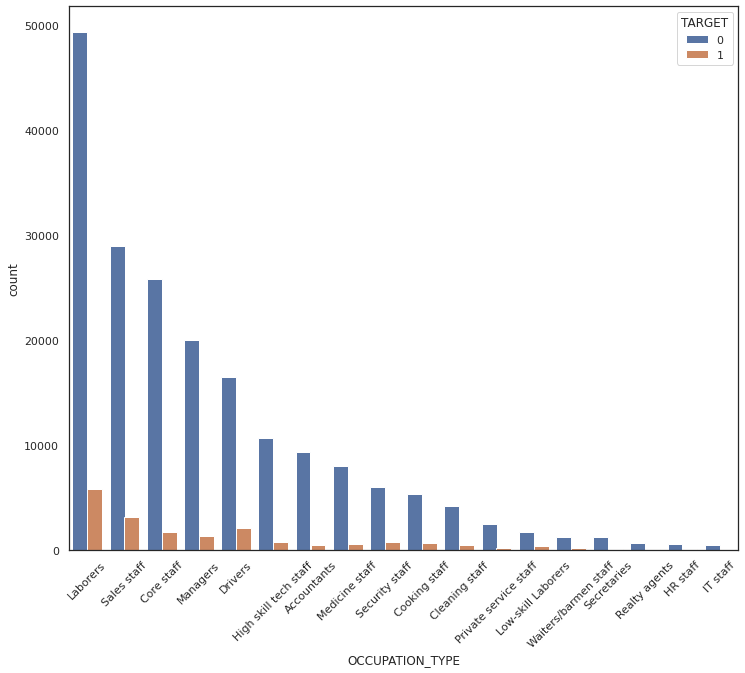

In [ ]:
plt.subplots(figsize=(12, 10))
plt.xticks(rotation = '45')
sns.countplot(x='OCCUPATION_TYPE', hue= 'TARGET', data = df, order = df['OCCUPATION_TYPE'].value_counts().index)

**Observations:** Applicants whose Occupation types are Laborers or Sales staff seems to be the highest both in fraud and non-fraud category. OCCUPATION_TYPE are realted to 'TARGET'. We will keep this column.

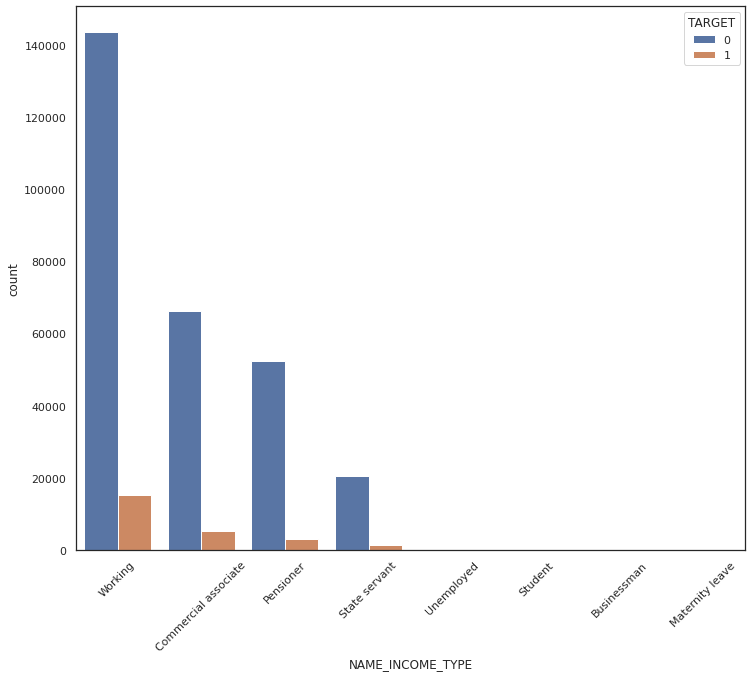

In [ ]:
plt.subplots(figsize=(12, 10))
plt.xticks(rotation = '45')
sns.countplot(x='NAME_INCOME_TYPE', hue= 'TARGET', data = df, order = df['NAME_INCOME_TYPE'].value_counts().index)

**Observations:** Working, Pensioner have a higher potential to be Credit card Defaulter. NAME_INCOME_TYPE are realted to 'TARGET'. We will keep this column.

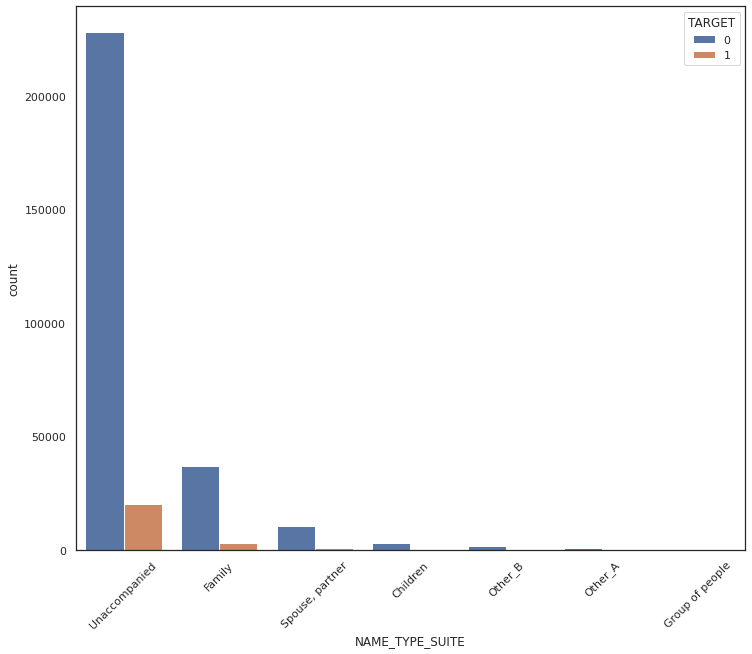

In [ ]:
plt.subplots(figsize=(12, 10))
plt.xticks(rotation = '45')
sns.countplot(x='NAME_TYPE_SUITE', hue= 'TARGET', data = df, order = df['NAME_TYPE_SUITE'].value_counts().index)

**Observations:** Unaccompanied looks more likely to be fraudsters. NAME_TYPE_SUITE are realted to 'TARGET'. We will keep this column.

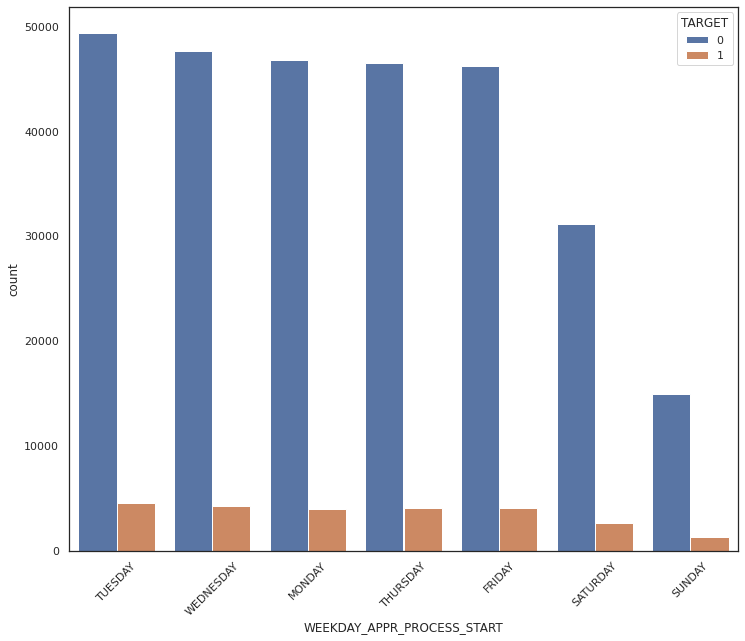

In [ ]:
plt.subplots(figsize=(12, 10))
plt.xticks(rotation = '45')
sns.countplot(x='WEEKDAY_APPR_PROCESS_START', hue= 'TARGET', data = df, order = df['WEEKDAY_APPR_PROCESS_START'].value_counts().index)

**Observations:** Fraud happened more frequently in weekend days than on weekend. WEEKDAY_APPR_PROCESS_START are realted to 'TARGET'. We will keep this column.

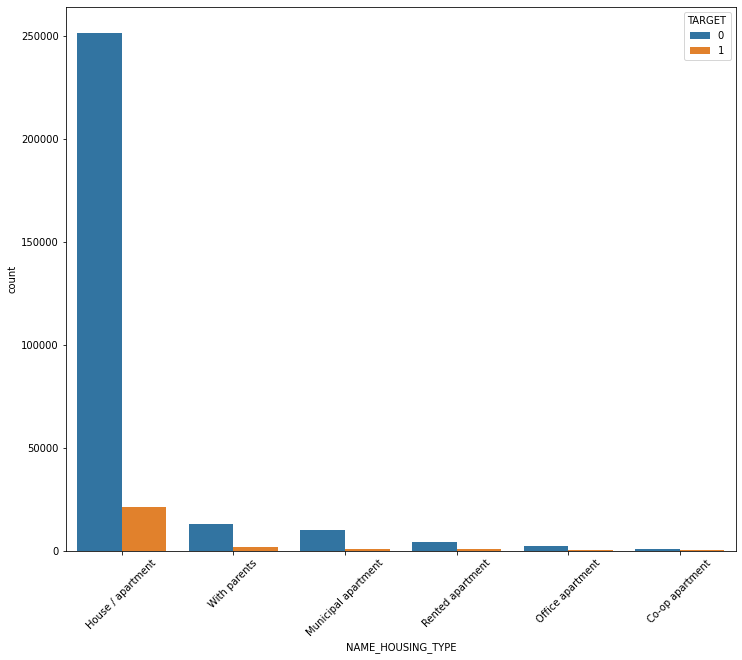

In [ ]:
plt.subplots(figsize=(12, 10))
plt.xticks(rotation = '45')
sns.countplot(x='NAME_HOUSING_TYPE', hue= 'TARGET', data = df, order = df['NAME_HOUSING_TYPE'].value_counts().index)

**Observations:** Persons who live on their own are more likely to be fraudlers. NAME_HOUSING_TYPE are realted to 'TARGET'. We will keep this column.

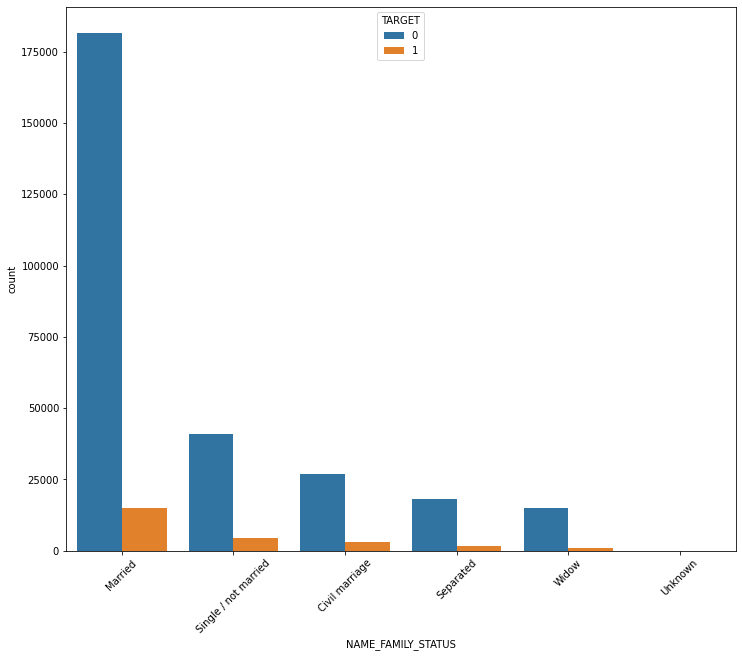

In [ ]:
plt.subplots(figsize=(12, 10))
plt.xticks(rotation = '45')
sns.countplot(x='NAME_FAMILY_STATUS', hue= 'TARGET', data = df, order = df['NAME_FAMILY_STATUS'].value_counts().index)

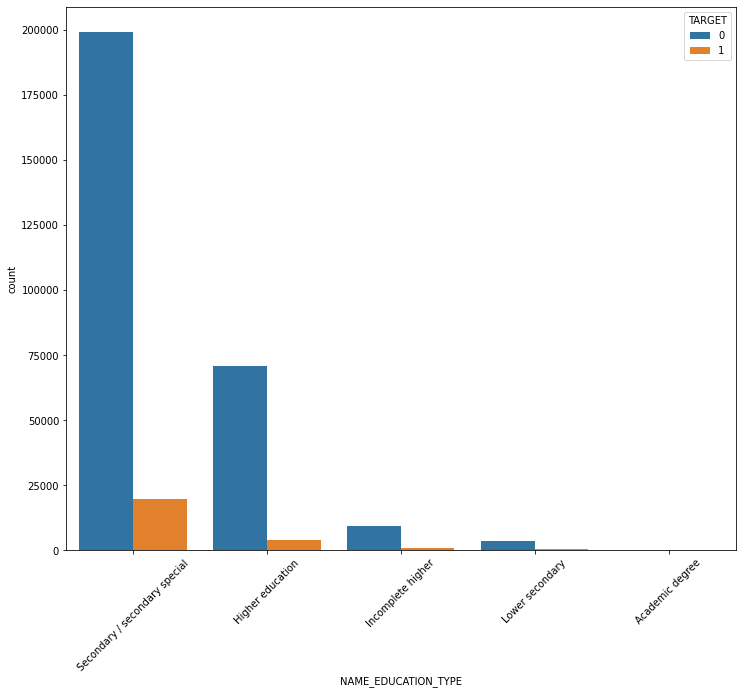

In [ ]:
plt.subplots(figsize=(12, 10))
plt.xticks(rotation = '45')
sns.countplot(x='NAME_EDUCATION_TYPE', hue= 'TARGET', data = df, order = df['NAME_EDUCATION_TYPE'].value_counts().index)

**Observations:** Persons who get married and with higher education is less likely to be fraudlers. NAME_HOUSING_TYPE are realted to 'TARGET'. We will keep this column.

**2.3** Data observation and cleaning for numeric features

In [ ]:
df_unique_num = df.select_dtypes('int64').describe().T
df_unique_num

,count,mean,std,min,25%,50%,75%,max
SK_ID_CURR,307511.0,278180.518577,102790.175348,100002.0,189145.5,278202.0,367142.5,456255.0
TARGET,307511.0,0.080729,0.272419,0.0,0.0,0.0,0.0,1.0
CNT_CHILDREN,307511.0,0.417052,0.722121,0.0,0.0,0.0,1.0,19.0
DAYS_BIRTH,307511.0,-16036.995067,4363.988632,-25229.0,-19682.0,-15750.0,-12413.0,-7489.0
DAYS_EMPLOYED,307511.0,63815.045904,141275.766519,-17912.0,-2760.0,-1213.0,-289.0,365243.0
DAYS_ID_PUBLISH,307511.0,-2994.202373,1509.450419,-7197.0,-4299.0,-3254.0,-1720.0,0.0
FLAG_MOBIL,307511.0,0.999997,0.001803,0.0,1.0,1.0,1.0,1.0
FLAG_EMP_PHONE,307511.0,0.819889,0.384280,0.0,1.0,1.0,1.0,1.0
FLAG_WORK_PHONE,307511.0,0.199368,0.399526,0.0,0.0,0.0,0.0,1.0
FLAG_CONT_MOBILE,307511.0,0.998133,0.043164,0.0,1.0,1.0,1.0,1.0


We found that a couple of columns have negative values, which does not make sense. For example, DAYS_BIRTH can not be negative.

In [ ]:
# Converting the negative values to positive values

df['DAYS_BIRTH'] = abs(df['DAYS_BIRTH'])
df['DAYS_ID_PUBLISH'] = abs(df['DAYS_ID_PUBLISH'])
df['DAYS_EMPLOYED'] = abs(df['DAYS_EMPLOYED'])
df['DAYS_REGISTRATION'] = abs(df['DAYS_REGISTRATION'])

In [ ]:
# Get the count,size and unique values in each column of application data

df.agg(['count','size','nunique'])

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,LANDAREA_AVG,LIVINGAREA_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,LANDAREA_MODE,LIVINGAREA_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,LANDAREA_MEDI,LIVINGAREA_MEDI,NONLIVINGAREA_MEDI,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511,307511,307511,307511,307511,307511,307511,307511,307511,307499,307233,306219,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,211120,307509,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,134133,306851,246546,151450,127568,157504,143620,152683,154491,124921,153161,137829,151450,127568,157504,143620,152683,154491,124921,153161,137829,151450,127568,157504,143620,152683,154491,124921,153161,137829,153214,159080,151170,161756,306490,306490,306490,306490,307510,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,265992,265992,265992,265992,265992,265992
size,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511
nunique,307511,2,2,3,2,2,15,2548,5603,13672,1002,7,8,5,6,6,81,17460,12574,15688,6168,2,2,2,2,2,2,18,17,3,3,7,24,2,2,2,2,2,2,58,114584,119831,814,2339,3780,285,257,285,403,3527,5199,3290,760,3841,221,26,30,25,3563,5301,3327,1148,3772,245,46,46,49,3560,5281,3323,3,5116,7,2,33,10,33,9,3773,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,5,9,9,24,11,25


We found that it is hard to read and extract informatin from DAYS_BIRTH when it displays as days. Convert this field to be AGE.

In [ ]:
# converting the days of birth to age
df['AGE'] = df['DAYS_BIRTH'] / 365

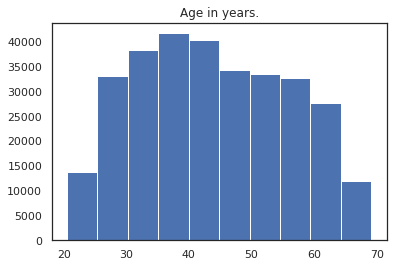

In [ ]:
plt.hist(df['AGE']);

plt.title('Age in years.');

**Observation:** The distribution of Age column looks normal and drop the column DAYS_BIRTH later.

In [ ]:
df['AGE'].describe()

count    307511.000000
mean         43.936973
std          11.956133
min          20.517808
25%          34.008219
50%          43.150685
75%          53.923288
max          69.120548
Name: AGE, dtype: float64

In [ ]:
#binning ages
age_data = df.loc[:,['TARGET', 'DAYS_BIRTH']]
age_data['age_group'] = pd.cut(x=df['AGE'], bins = [20,30,40,50,60,70], labels=['Age20-30','Age31-40','Age41-50','Age51-60','Age61-70'])
age_data.reset_index()
age_data.head(10)

,TARGET,DAYS_BIRTH,age_group
0,1,9461,Age20-30
1,0,16765,Age41-50
2,0,19046,Age51-60
3,0,19005,Age51-60
4,0,19932,Age51-60
5,0,16941,Age41-50
6,0,13778,Age31-40
7,0,18850,Age51-60
8,0,20099,Age51-60
9,0,14469,Age31-40


In [ ]:
age_data['age_group'].unique()

['Age20-30', 'Age41-50', 'Age51-60', 'Age31-40', 'Age61-70']
Categories (5, object): ['Age20-30' < 'Age31-40' < 'Age41-50' < 'Age51-60' < 'Age61-70']

In [ ]:
df2 = age_data.groupby(['age_group'])['TARGET'].count().reset_index(name='total')
df3 = age_data.groupby(['age_group'])['TARGET'].sum().reset_index(name='fraud')
df_combined = df2.merge(df3)
df_combined['percentage'] = (df_combined['fraud']/df_combined['total'])*100
df_combined.drop(['fraud','total'], axis=1, inplace=True)

In [ ]:
df_combined

,age_group,percentage
0,Age20-30,11.456876
1,Age31-40,9.583516
2,Age41-50,7.650802
3,Age51-60,6.129705
4,Age61-70,4.921442


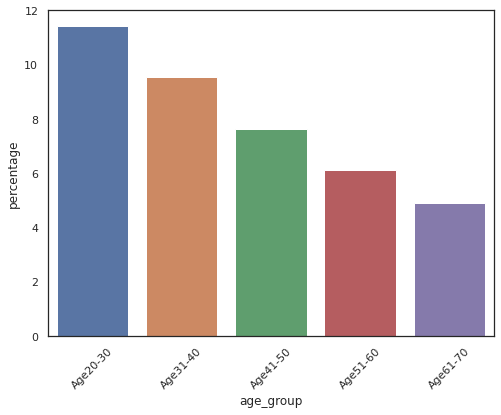

In [ ]:
plt.subplots(figsize=(8, 6))
plt.xticks(rotation = '45')
sns.barplot(data=df_combined, x="age_group", y="percentage")
plt.show()

**Observation:** The likelihood to be a fraudler was higher in the younger age group as compared to older applicants. As the age increased the risk decreased. We will keep this feature.

In [ ]:
#dropping the columns that store the Normalized information about building where the client lives
MODE_cols = [col for col in df.columns if '_MODE' in col]
df.drop(columns = MODE_cols,inplace=True)

Now, we only have 93 features.

In [ ]:
df.shape

(307511, 93)

# **Part III:** Feature Engineering


**3.1** check feature groups, drop uncessary features

In [ ]:
df.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL',
       'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS',
       'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY',
       'ORGANIZATION_TYPE', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3',
       'APARTMENTS_AVG', 'BA

We currently has 93 features. To better investigate these features and decide which one to be dropped, we divide them into several groups based on column name similarity.

'SK_ID_CURR' is more like a identifier, will drop it

In [ ]:
df.drop(['SK_ID_CURR'], axis=1, inplace=True)

Columns with '_MEDI' and Columns with '_AVG' have very similar pattern for correlation and both of them have little correlation with TARGET label. We are going to drop them. 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if sys.path[0] == '':


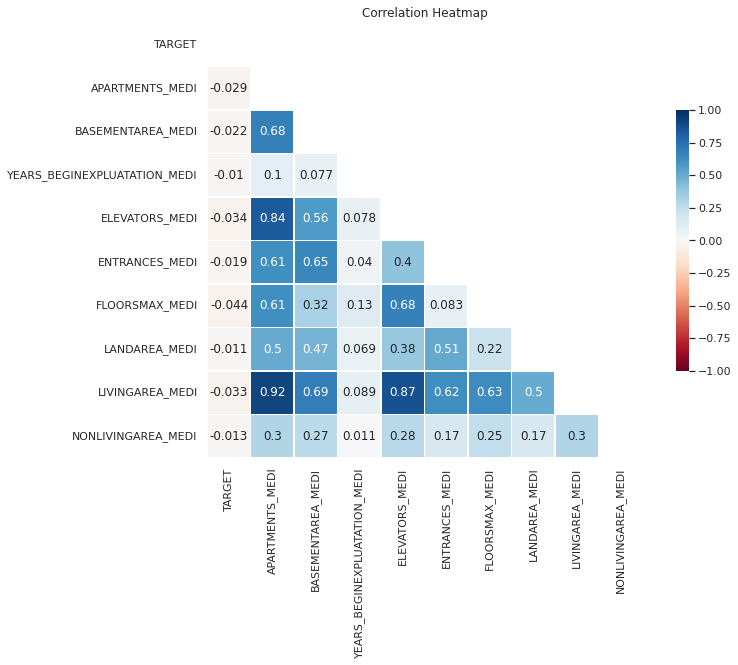

In [ ]:
MEDI_cols = [col for col in df.columns if '_MEDI' in col or 'TARGET' in col]
MEDI_df = df[MEDI_cols]

correlation_matrix = MEDI_df.corr()

sns.set(style = "white")
# Compute the correlation matrix
# ASSIGN THE "corr" VARIABLE TO YOUR CORRELATION MATRIX
corr = correlation_matrix

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(12, 8))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap="RdBu", vmin=-1, vmax=1, center=0,
            square=True, linewidths=.5,annot=True, cbar_kws={"shrink": 0.6})
plt.title("Correlation Heatmap")
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if sys.path[0] == '':


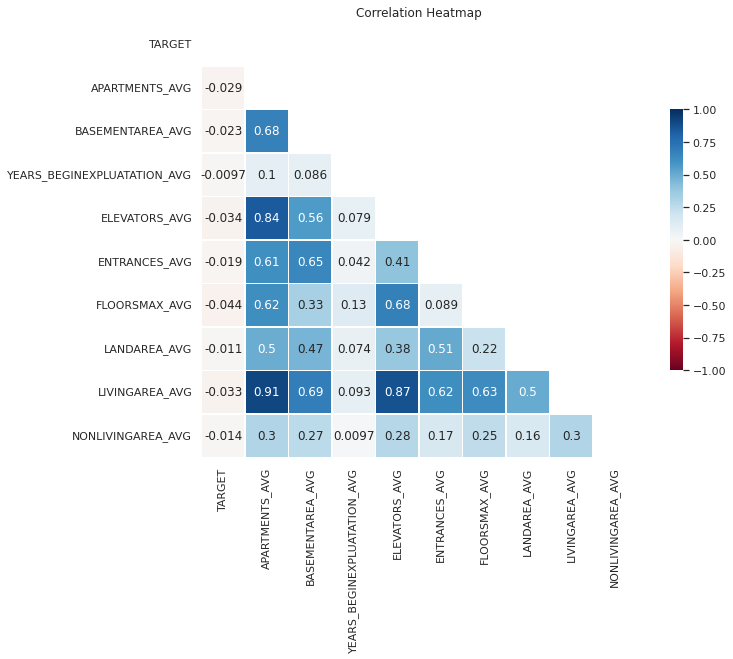

In [ ]:
AVG_cols = [col for col in df.columns if '_AVG' in col or 'TARGET' in col]
AVG_df = df[AVG_cols] 

correlation_matrix = AVG_df.corr()

sns.set(style = "white")
# Compute the correlation matrix
# ASSIGN THE "corr" VARIABLE TO YOUR CORRELATION MATRIX
corr = correlation_matrix

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(12, 8))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap="RdBu", vmin=-1, vmax=1, center=0,
            square=True, linewidths=.5,annot=True, cbar_kws={"shrink": 0.6})
plt.title("Correlation Heatmap")
plt.show()

All these columns just contains flags that indicate whether or not the document submission, phone, email or mobil is shown in the application. They have little correlation with the fraud label. But to maxmize the use of features. We will create a new feature which sum all Flag_document since document submission may count for person's reliablity. In other words, these persons may be less likelihood to be a fraudler.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if sys.path[0] == '':


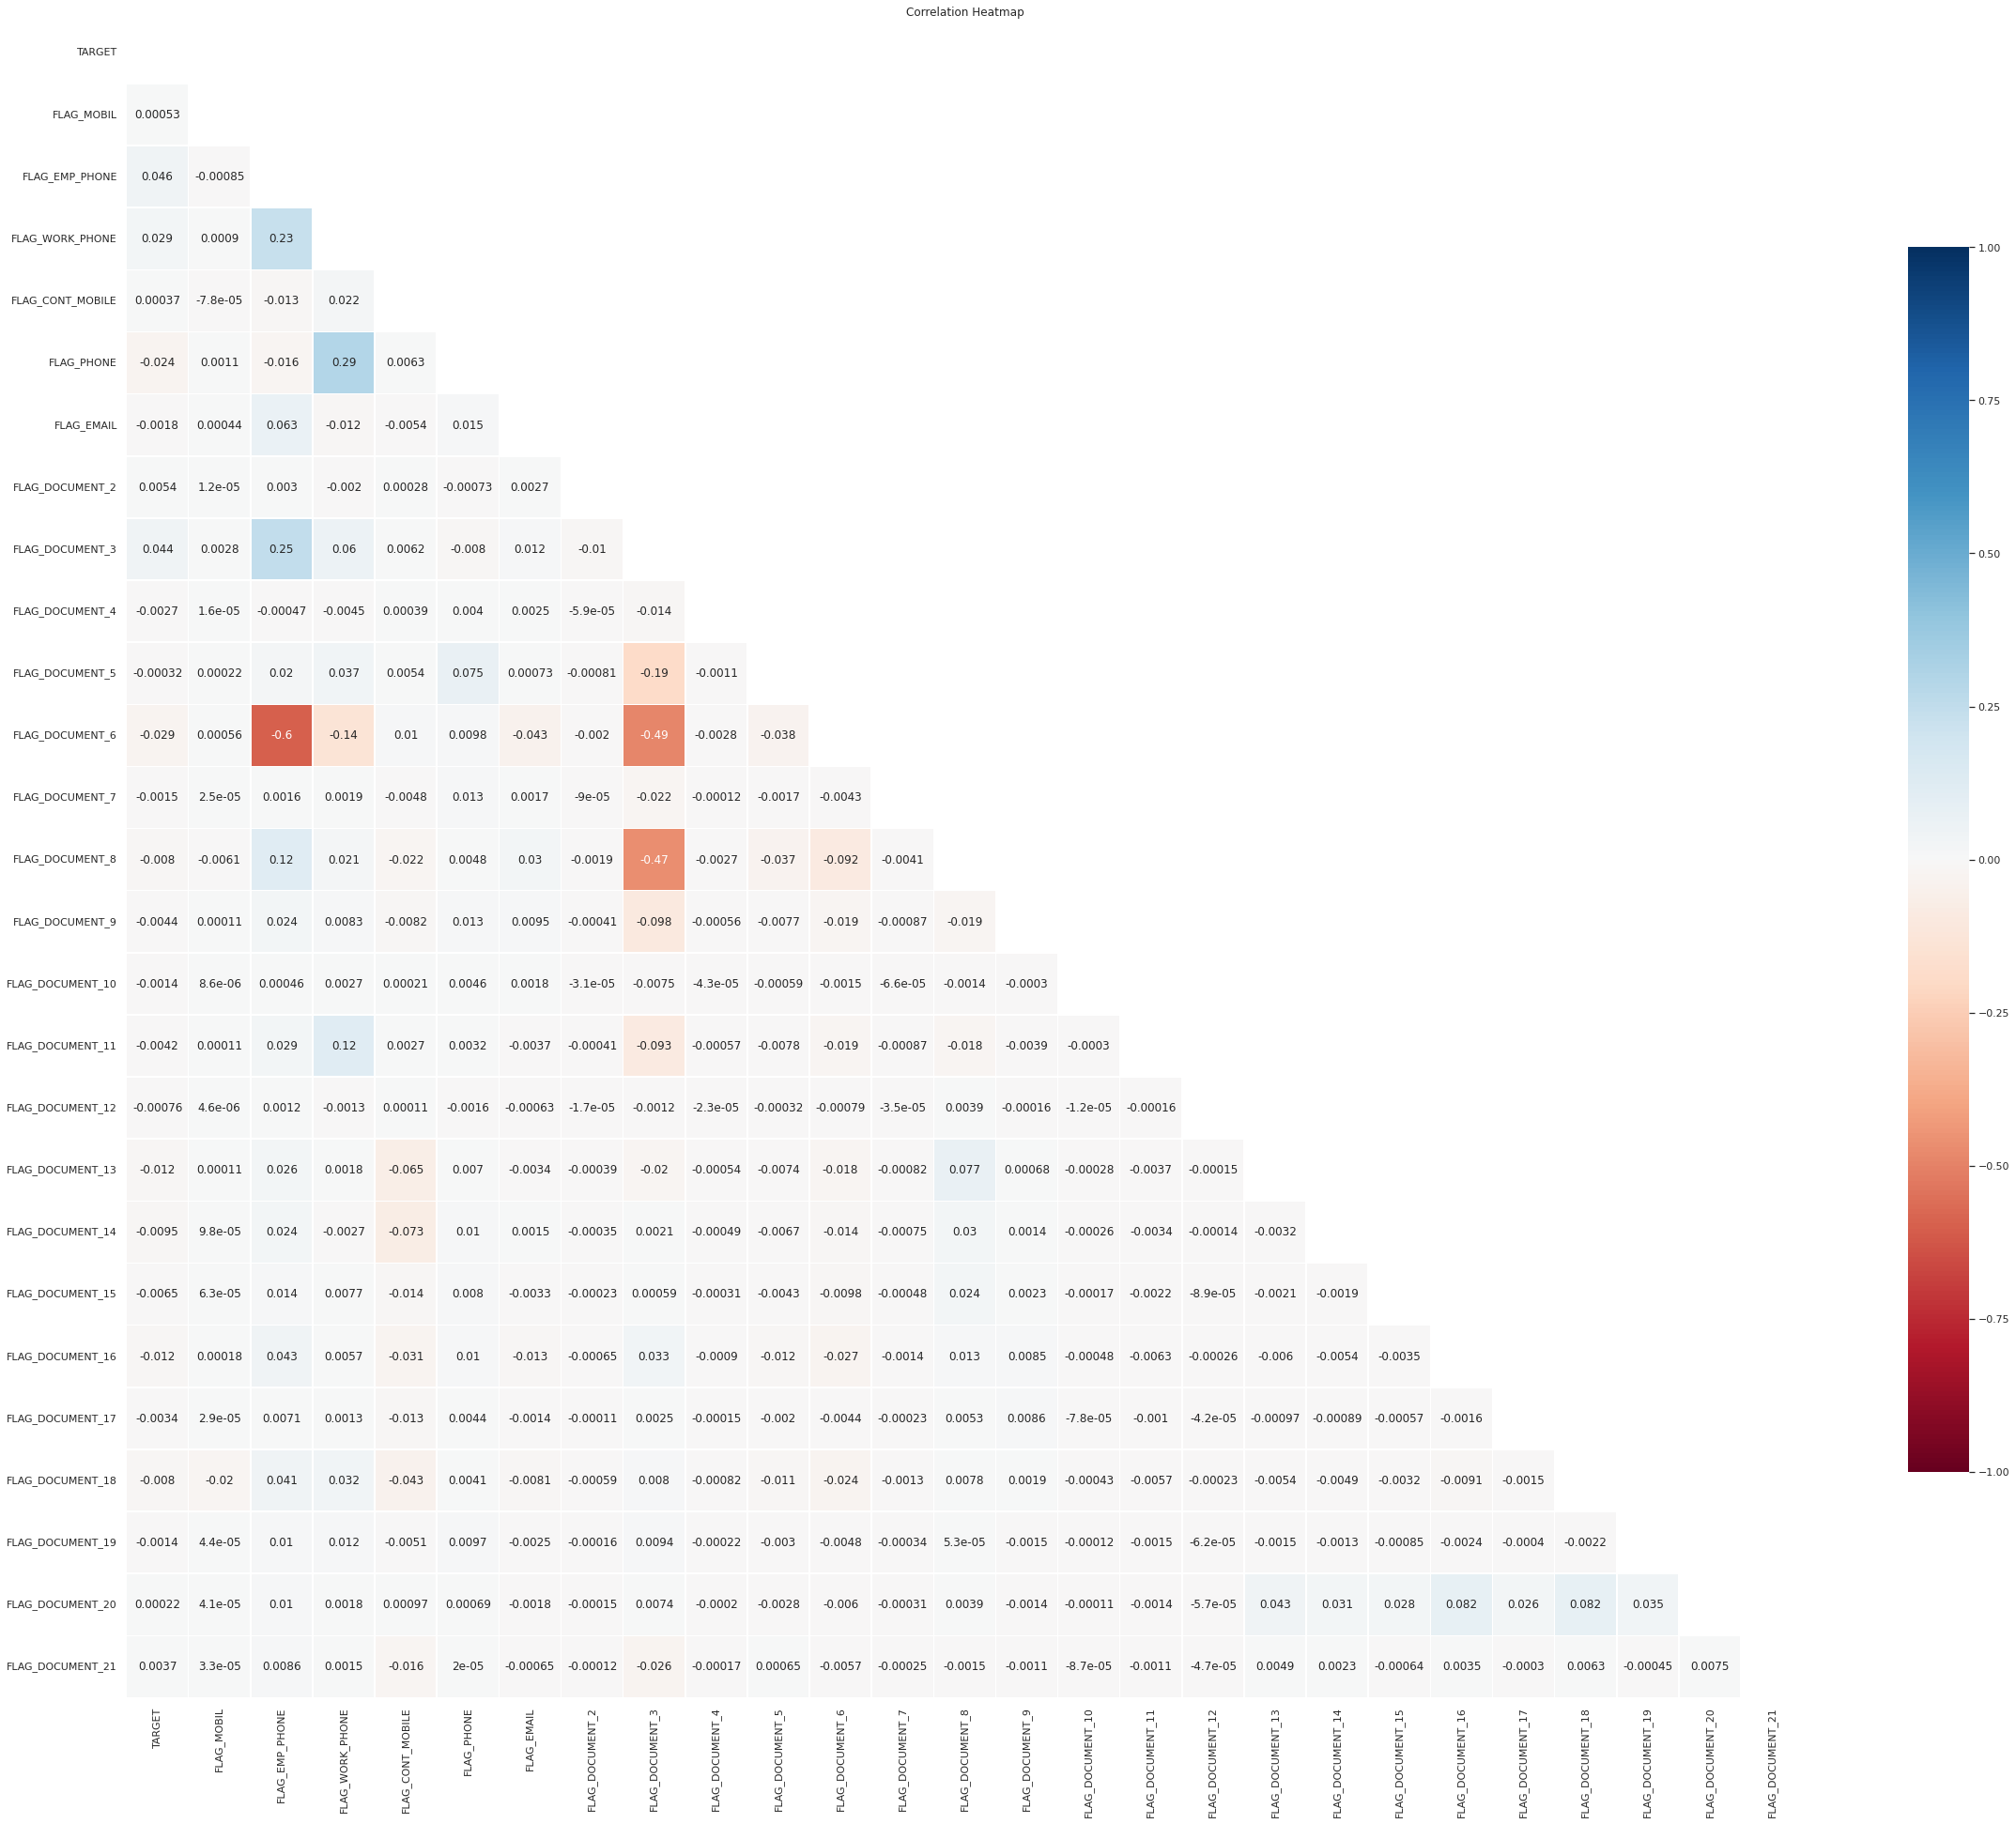

In [ ]:
FLAG_cols = [col for col in df.columns if 'FLAG_' in col or 'TARGET' in col]
FLAG_df = df[FLAG_cols] 

correlation_matrix = FLAG_df.corr()

sns.set(style = "white")
# Compute the correlation matrix
# ASSIGN THE "corr" VARIABLE TO YOUR CORRELATION MATRIX
corr = correlation_matrix

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(40, 40))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap="RdBu", vmin=-1, vmax=1, center=0,
            square=True, linewidths=.5,annot=True, cbar_kws={"shrink": 0.6})
plt.title("Correlation Heatmap")
plt.show()

In [ ]:
df['docs'] = df['FLAG_DOCUMENT_2']+df['FLAG_DOCUMENT_3']+df['FLAG_DOCUMENT_4'] + df['FLAG_DOCUMENT_5'] + df['FLAG_DOCUMENT_6'] + df['FLAG_DOCUMENT_7'] + df['FLAG_DOCUMENT_8'] + df['FLAG_DOCUMENT_9'] + df['FLAG_DOCUMENT_10'] + df['FLAG_DOCUMENT_11'] + df['FLAG_DOCUMENT_12'] + df['FLAG_DOCUMENT_13'] + df['FLAG_DOCUMENT_14'] + df['FLAG_DOCUMENT_15'] + df['FLAG_DOCUMENT_16'] + df['FLAG_DOCUMENT_17'] + df['FLAG_DOCUMENT_18'] + df['FLAG_DOCUMENT_19'] +df['FLAG_DOCUMENT_20'] + df['FLAG_DOCUMENT_21']

In [ ]:
FLAG_cols

['TARGET',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'FLAG_DOCUMENT_2',
 'FLAG_DOCUMENT_3',
 'FLAG_DOCUMENT_4',
 'FLAG_DOCUMENT_5',
 'FLAG_DOCUMENT_6',
 'FLAG_DOCUMENT_7',
 'FLAG_DOCUMENT_8',
 'FLAG_DOCUMENT_9',
 'FLAG_DOCUMENT_10',
 'FLAG_DOCUMENT_11',
 'FLAG_DOCUMENT_12',
 'FLAG_DOCUMENT_13',
 'FLAG_DOCUMENT_14',
 'FLAG_DOCUMENT_15',
 'FLAG_DOCUMENT_16',
 'FLAG_DOCUMENT_17',
 'FLAG_DOCUMENT_18',
 'FLAG_DOCUMENT_19',
 'FLAG_DOCUMENT_20',
 'FLAG_DOCUMENT_21']

In [ ]:
unwanted = ['FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'FLAG_DOCUMENT_2',
 'FLAG_DOCUMENT_3',
 'FLAG_DOCUMENT_4',
 'FLAG_DOCUMENT_5',
 'FLAG_DOCUMENT_6',
 'FLAG_DOCUMENT_7',
 'FLAG_DOCUMENT_8',
 'FLAG_DOCUMENT_9',
 'FLAG_DOCUMENT_10',
 'FLAG_DOCUMENT_11',
 'FLAG_DOCUMENT_12',
 'FLAG_DOCUMENT_13',
 'FLAG_DOCUMENT_14',
 'FLAG_DOCUMENT_15',
 'FLAG_DOCUMENT_16',
 'FLAG_DOCUMENT_17',
 'FLAG_DOCUMENT_18',
 'FLAG_DOCUMENT_19',
 'FLAG_DOCUMENT_20',
 'FLAG_DOCUMENT_21']

In [ ]:
cleaned_df = df.drop(unwanted, axis=1)

In [ ]:

cleaned_df.shape

(307511, 65)

Drop features containing AVG and MEDI

In [ ]:
AVG_cols = [col for col in cleaned_df.columns if '_AVG' in col]
cleaned_df = cleaned_df.drop(AVG_cols, axis=1)

In [ ]:
MEDI_cols = [col for col in cleaned_df.columns if '_MEDI' in col]
cleaned_df = cleaned_df.drop(MEDI_cols, axis=1)

In [ ]:
cleaned_df.shape

(307511, 47)

now we have 47 features

In [ ]:
df=cleaned_df


**3.2** Convert categorical to numerical and handel missing values

In [ ]:

## check categorical features
print("Categorical feature numbers:",np.count_nonzero(df.select_dtypes('object').columns))

print(df.select_dtypes('object').columns)

Categorical feature numbers: 10
Index(['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE', 'WEEKDAY_APPR_PROCESS_START',
       'ORGANIZATION_TYPE'],
      dtype='object')


Handel missing values for categorical features

In [ ]:
cat_list = ['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE', 'WEEKDAY_APPR_PROCESS_START',
       'ORGANIZATION_TYPE']

In [ ]:
df[cat_list].isnull().values.any()

True

In [ ]:
df[cat_list]= df[cat_list].fillna("Unknown")
df[cat_list][:5]

,NAME_CONTRACT_TYPE,CODE_GENDER,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,OCCUPATION_TYPE,WEEKDAY_APPR_PROCESS_START,ORGANIZATION_TYPE
0,Cash loans,M,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Laborers,WEDNESDAY,Business Entity Type 3
1,Cash loans,F,Family,State servant,Higher education,Married,House / apartment,Core staff,MONDAY,School
2,Revolving loans,M,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Laborers,MONDAY,Government
3,Cash loans,F,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,Laborers,WEDNESDAY,Business Entity Type 3
4,Cash loans,M,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Core staff,THURSDAY,Religion


In [ ]:
df[cat_list].isnull().values.any()

False

Handel missing values first then encode categorical features to numerical features

In [ ]:
le = LabelEncoder()
df['NAME_CONTRACT_TYPE'] = le.fit_transform(df['NAME_CONTRACT_TYPE'])
df['CODE_GENDER'] = le.fit_transform(df['CODE_GENDER'])
df['NAME_TYPE_SUITE'] = le.fit_transform(df['NAME_TYPE_SUITE'].astype(str))
df['NAME_INCOME_TYPE'] = le.fit_transform(df['NAME_INCOME_TYPE'])
df['NAME_EDUCATION_TYPE'] = le.fit_transform(df['NAME_EDUCATION_TYPE'])
df['NAME_FAMILY_STATUS'] = le.fit_transform(df['NAME_FAMILY_STATUS'])
df['NAME_HOUSING_TYPE'] = le.fit_transform(df['NAME_HOUSING_TYPE'])
df['OCCUPATION_TYPE'] = le.fit_transform(df['OCCUPATION_TYPE'].astype(str))
df['WEEKDAY_APPR_PROCESS_START'] = le.fit_transform(df['WEEKDAY_APPR_PROCESS_START'])
df['ORGANIZATION_TYPE'] = le.fit_transform(df['ORGANIZATION_TYPE'])

Handel numerical feature missing values with mode

In [ ]:
df = df.fillna(df.mean())

In [ ]:
df.shape

(307511, 47)

In [ ]:
df.isnull().values.any()

False

In [ ]:
df[:2]

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AGE,docs
0,1,0,1,0,202500.0,406597.5,24700.5,351000.0,6,7,4,3,1,0.018801,9461,637,3648.0,2120,8,1.0,2,2,6,10,0,0,0,0,0,0,5,0.083037,0.262949,0.139376,2.0,2.0,2.0,2.0,-1134.0,0.0,0.0,0.0,0.0,0.0,1.0,25.920548,1
1,0,0,0,0,270000.0,1293502.5,35698.5,1129500.0,1,4,1,1,1,0.003541,16765,1188,1186.0,291,3,2.0,1,1,1,11,0,0,0,0,0,0,39,0.311267,0.622246,0.510853,1.0,0.0,1.0,0.0,-828.0,0.0,0.0,0.0,0.0,0.0,0.0,45.931507,1


# **Part IV:** Build a Classification Model


**4.1** Build a baseline model

In [ ]:
X = df.drop(['TARGET'],axis = 1)
y = df['TARGET']

Split Train / Test set

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size= 0.3, random_state = 42)

Accuracy is:  0.9196999588093742


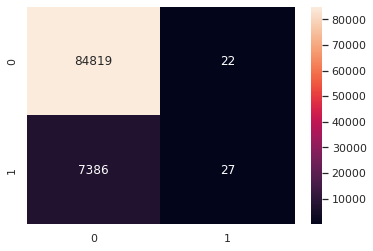

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score,confusion_matrix
from sklearn.metrics import accuracy_score


#random forest classifier with n_estimators=10 (default)
clf_rf = RandomForestClassifier(random_state=43)      
clr_rf = clf_rf.fit(x_train,y_train)

ac = accuracy_score(y_test,clf_rf.predict(x_test))
print('Accuracy is: ',ac)
cm = confusion_matrix(y_test,clf_rf.predict(x_test))
sns.heatmap(cm,annot=True,fmt="d")

In [ ]:

y_pred = clr_rf.predict(x_test)
y_pred_proba = clr_rf.predict_proba(x_test)[::,1]
precision_test = precision_score(y_test, y_pred)
recall_test = recall_score(y_test, y_pred)
print('Precision is: ',precision_test)
print('Recall is: ',recall_test)

Precision is:  0.5510204081632653
Recall is:  0.003642250101173614


We built a random forest model and current accuracy is 91.96%, but it might due to imbalanced dataset, also both precison and recall are low so we would like to improve that


**4.2** Try different model methods

In [ ]:
def ml_model(X_train,X_test, Y_train, Y_test):
  MLA = [LogisticRegression(),DecisionTreeClassifier(),GaussianNB()]
  MLA_columns = []
  MLA_compare = pd.DataFrame(columns = MLA_columns)
  row_index = 0
  for alg in MLA:
    predicted = alg.fit(x_train, y_train).predict(x_test)
    MLA_name = alg.__class__.__name__
    MLA_compare.loc[row_index,'Model Name'] = MLA_name
    MLA_compare.loc[row_index, 'Train Accuracy'] = round(alg.score(x_train, y_train), 2)
    MLA_compare.loc[row_index, 'Test Accuracy'] = round(alg.score(x_test, y_test), 2)
    MLA_compare.loc[row_index, 'Precision'] = round(precision_score(y_test, predicted),2)
    MLA_compare.loc[row_index, 'Recall'] = round(recall_score(y_test, predicted),2)
    MLA_compare.loc[row_index, 'F1 score'] = round(f1_score(y_test, predicted),2)
    row_index+=1
  MLA_compare.sort_values(by = ['Test Accuracy'], ascending = False, inplace = True)    
  return MLA_compare  
ml_model(x_train,x_test, y_train, y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,Model Name,Train Accuracy,Test Accuracy,Precision,Recall,F1 score
0,LogisticRegression,0.92,0.92,0.00,0.00,0.00
2,GaussianNB,0.92,0.92,0.00,0.00,0.00
1,DecisionTreeClassifier,1.00,0.85,0.14,0.16,0.15


Worse Performance. We would like to handel imbalance dataset first then use feature selection method to finalized a feature list, then do the modeling this time


**4.3** Oversampling imbalanced dataset to improve performance

One way to fight imbalance data is to generate new samples in the minority classes. SMOTE (Synthetic Minority Oversampling Technique) works by randomly picking a point from the minority class and computing the k-nearest neighbors for this point. The synthetic points are added between the chosen point and its neighbors.

**SMOTE algorithm works in 4 simple steps:**

Choose a minority class as the input vector
Find its k nearest neighbors (k_neighbors is specified as an argument in the SMOTE() function)
Choose one of these neighbors and place a synthetic point anywhere on the line joining the point under consideration and its chosen neighbor
Repeat the steps until data is balanced

In [ ]:
# import library
from imblearn.over_sampling import SMOTE

smote = SMOTE()

# fit predictor and target variable
x_smote, y_smote = smote.fit_resample(x_train, y_train)



Accuracy is:  0.9173911158323759


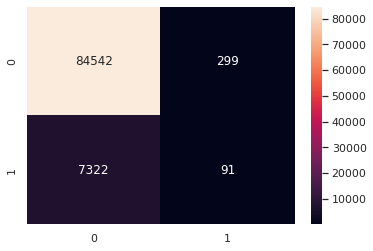

In [ ]:
#random forest classifier with n_estimators=10 (default)
clf_rf_oversample = RandomForestClassifier(random_state=43)      
clr_rf_oversample = clf_rf_oversample.fit(x_smote,y_smote)

ac = accuracy_score(y_test,clr_rf_oversample.predict(x_test))
print('Accuracy is: ',ac)
cm = confusion_matrix(y_test,clr_rf_oversample.predict(x_test))
sns.heatmap(cm,annot=True,fmt="d")

In [ ]:

y_pred = clr_rf_oversample.predict(x_test)
y_pred_proba = clr_rf_oversample.predict_proba(x_test)[::,1]
precision_test = precision_score(y_test, y_pred)
recall_test = recall_score(y_test, y_pred)
print('Precision is: ',precision_test)
print('Recall is: ',recall_test)

Precision is:  0.23333333333333334
Recall is:  0.012275731822474031


Getting worse, try scale features rather than oversampling since we have 8% target data, it's okay to ignore imbalance problem now


**4.4** Try different modeling methods to improve performance

In [ ]:
def model_Evaluate(model, X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3, random_state = 2020)
    scaler = RobustScaler().fit(X_train)
    X_train_scaled = scaler.transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    # accuracy of model on training data
    acc_train = model.score(X_train_scaled, y_train)
    # accuracy of model on test data
    acc_test = model.score(X_test_scaled, y_test)
    
    print('Accuracy of model on training data : {}'.format(acc_train*100))
    print('Accuracy of model on testing data : {} \n'.format(acc_test*100))

    # Predict values for Test dataset
    y_pred = model.predict(X_test_scaled)
    y_pred_proba = model.predict_proba(X_test_scaled)[::,1]
      # y_score
    try:
        y_score = model.fit(X_train_scaled, y_train).decision_function(X_test_scaled)
    except:
        pass
    
    try:
        clf = model.fit(X_train_scaled, y_train)
        y_score = clf.predict_proba(X_test_scaled)
    except:
        pass
     # precision of model on test data
    pre_test = precision_score(y_test, y_pred)
    
    # recall of model on test data
    rec_test = recall_score(y_test, y_pred)
    
    # f1 of model on test data
    f1_test = f1_score(y_test, y_pred)
    
    # f2 of model on test data
    f2_test = fbeta_score(y_test, y_pred, beta=2, average='macro')
    
    # AUC of model on test data
    auc_test = roc_auc_score(y_test, y_pred_proba)
    
    # Mattews_corrcoef
    mcc = matthews_corrcoef(y_pred, y_test)
     # Print the evaluation metrics for the dataset.
    print(classification_report(y_test, y_pred))
    print(f'precision: {pre_test}')
    print(f'recall: {rec_test}')
    print(f'f1 score: {f1_test}')
    print(f'f2 score: {f2_test}')
    # Compute and plot the Confusion matrix
    cf_matrix = confusion_matrix(y_test, y_pred)

    categories  = ['Negative','Positive']
    group_names = ['True Neg','False Pos', 'False Neg','True Pos']
    group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten() / np.sum(cf_matrix)]

    labels = [f'{v1}\n{v2}' for v1, v2 in zip(group_names,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)

    sns.heatmap(cf_matrix, annot = labels, cmap = 'Reds',fmt = '',
                xticklabels = categories, yticklabels = categories)

    plt.xlabel("Predicted values", fontdict = {'size':14}, labelpad = 10)
    plt.ylabel("Actual values"   , fontdict = {'size':14}, labelpad = 10)
    plt.title ("Confusion Matrix", fontdict = {'size':18}, pad = 20)
    
    d = {'Train_Accuracy': [acc_train], 'Test_Accuracy': [acc_test], 
         'Precision': [pre_test], 'Recall': [rec_test],
         'AUC': [auc_test], 'F1_Score': [f1_test], 'F2_Score': [f2_test], 
         'Roc_Auc_score': auc_test}
    df = pd.DataFrame(data=d)
    # summarize feature importance
    print(type(model).__name__)
    modelName = type(model).__name__
    if (modelName not in exclude_model):
        if(modelName in featureimportance) :
            impt = zip(X_train.columns, model.feature_importances_)
            sorted_impt = sorted(impt, key = lambda x:abs(x[1]), reverse = True)
        else:
            impt = zip(X_train.columns, model.coef_[0])
            sorted_impt = sorted(impt, key = lambda x:abs(x[1]), reverse = True)
        for feat, importance in sorted(impt, key = lambda x:abs(x[1]), reverse = True)[:10]:
                print('feature: {f}, importance: {i}'.format(f=feat, i=importance))
        fig = plt.figure(figsize =(25, 7))
        sns.barplot([item[0] for item in sorted_impt[:10]], [item[1] for item in sorted_impt[:10]], capsize = 2)
        plt.title('feature importance bar chart')
        plt.show()

In [ ]:
featureimportance = ['XGBClassifier', 'RandomForestClassifier']
exclude_model = ['CalibratedClassifierCV', 'KNeighborsClassifier','StackingClassifier']

In [ ]:
scaler = RobustScaler().fit(x_train)
X_train_scaled = scaler.transform(x_train)
X_test_scaled = scaler.transform(x_test)

A. XGboost

In [ ]:
xgb_class = xgb.XGBClassifier(objective ='binary:logistic', max_depth = 8, n_estimators = 20,  use_label_encoder=False)

Accuracy of model on training data : 91.99514998350809
Accuracy of model on testing data : 92.04587334966506 

              precision    recall  f1-score   support

           0       0.92      1.00      0.96     84833
           1       0.82      0.01      0.03      7421

    accuracy                           0.92     92254
   macro avg       0.87      0.51      0.49     92254
weighted avg       0.91      0.92      0.88     92254

precision: 0.8217054263565892
recall: 0.014283789246732246
f1 score: 0.028079470198675495
f2 score: 0.500305033903371
XGBClassifier


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


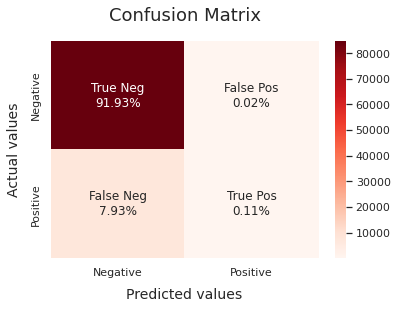

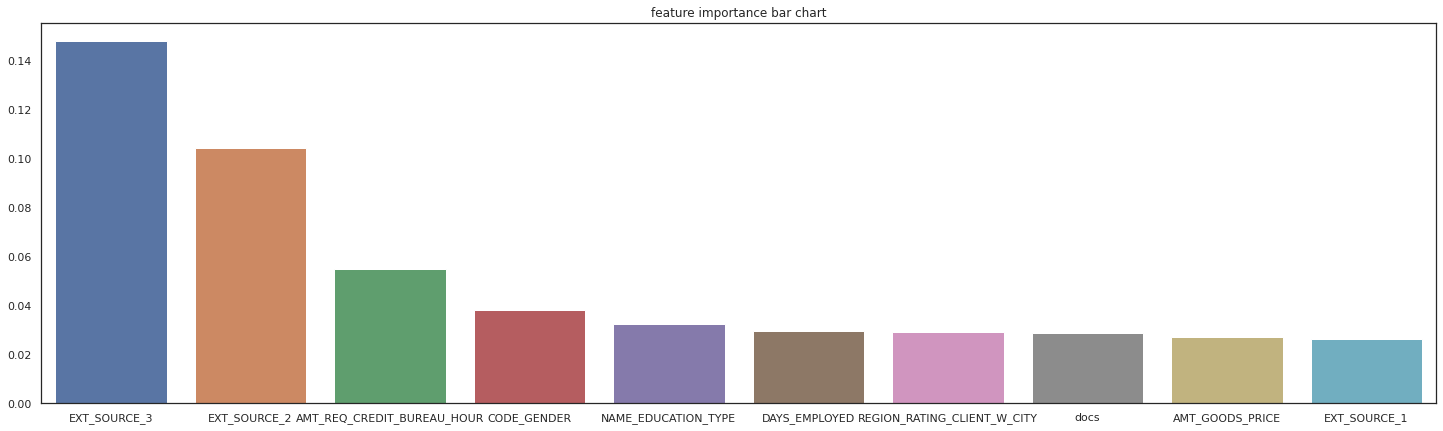

In [ ]:
xgb_class.fit(X_train_scaled,y_train,
             eval_metric='logloss')
xgb_df = model_Evaluate(xgb_class, X, y)

B. Random Forest

Accuracy of model on training data : 93.415312858583
Accuracy of model on testing data : 93.45719426799923 

              precision    recall  f1-score   support

           0       0.93      1.00      0.97     84833
           1       0.99      0.19      0.32      7421

    accuracy                           0.93     92254
   macro avg       0.96      0.59      0.64     92254
weighted avg       0.94      0.93      0.91     92254

precision: 0.9914833215046132
recall: 0.18824956205363158
f1 score: 0.3164212910532276
f2 score: 0.6052667573428526
RandomForestClassifier


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


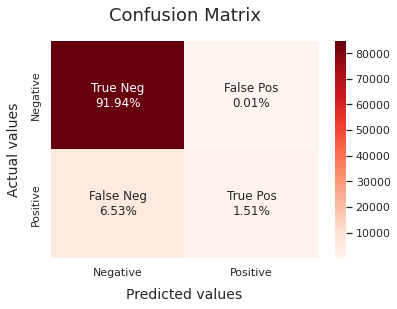

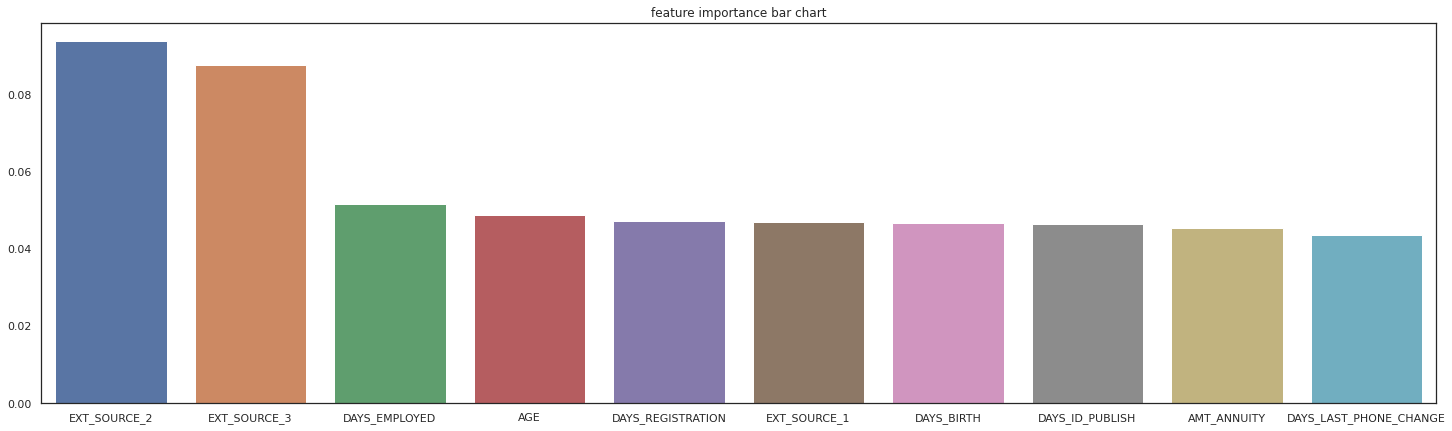

In [ ]:
rf = RandomForestClassifier(n_estimators = 20, criterion = 'entropy', max_depth=20)
rf.fit(X_train_scaled, y_train)
rf_df = model_Evaluate(rf, X, y)

C. Logistic Regression

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


Accuracy of model on training data : 91.90409603404302
Accuracy of model on testing data : 91.97107984477638 



/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


              precision    recall  f1-score   support

           0       0.92      1.00      0.96     84833
           1       0.54      0.01      0.02      7421

    accuracy                           0.92     92254
   macro avg       0.73      0.51      0.49     92254
weighted avg       0.89      0.92      0.88     92254

precision: 0.5411764705882353
recall: 0.012397251044333648
f1 score: 0.024239230667896194
f2 score: 0.4988484386228567
LogisticRegression


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


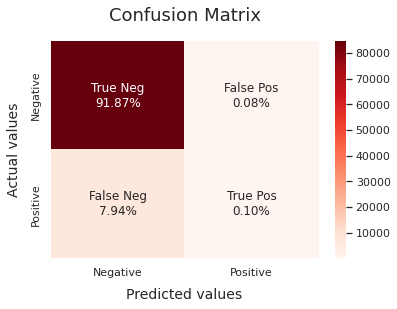

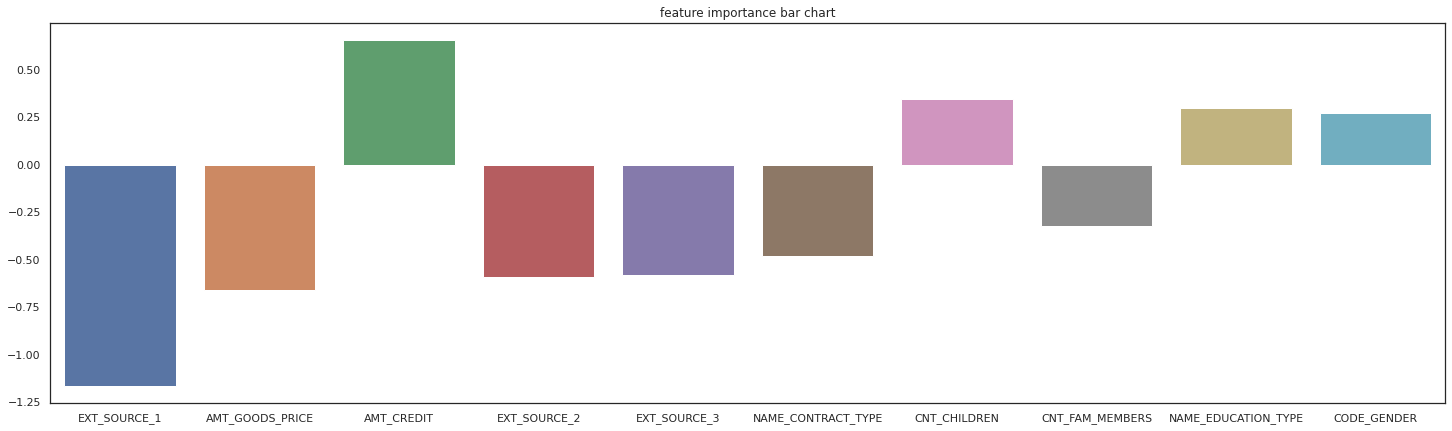

In [ ]:
lg = LogisticRegression(solver='lbfgs', max_iter=100, verbose=0, warm_start=False, l1_ratio=None)
history=lg.fit(X_train_scaled, y_train)
lg_df = model_Evaluate(lg, X, y)

# **Part V:** Conclusion

1. After data exploration and feature enginering, our final dataset has 47 features
2. We tried different modeling methods, also tried oversampling to handel imbalanced dataset
3. By the end we decide to use random forest as our final model, with 93.46% accuracy, 99% precision, 18.8% recall, 61% f2-score. 
4. Our most important features are: EXT_SOURCE, DAYS_IN_PUBLISH, DAYS_REGISTRATION, AGE, DAYS_EMPLOYED